#**Wine Quality Machine Learning Project**

Complete ML project using Wine Quality dataset.  
Steps: EDA → Preprocessing → Model Building → Comparison → Hyperparameter Tuning → Feature Importance


#**Import Libraries**

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


#**Load Dataset**

In [189]:
import pandas as pd

df = pd.read_csv('/run/winequality.csv')
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#**Basic Data Analysis**

In [190]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [191]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [192]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#**Check Missing Values**

In [193]:
print("Missing values:")
df.isnull().sum()


Missing values:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#**Correlation Analysis**

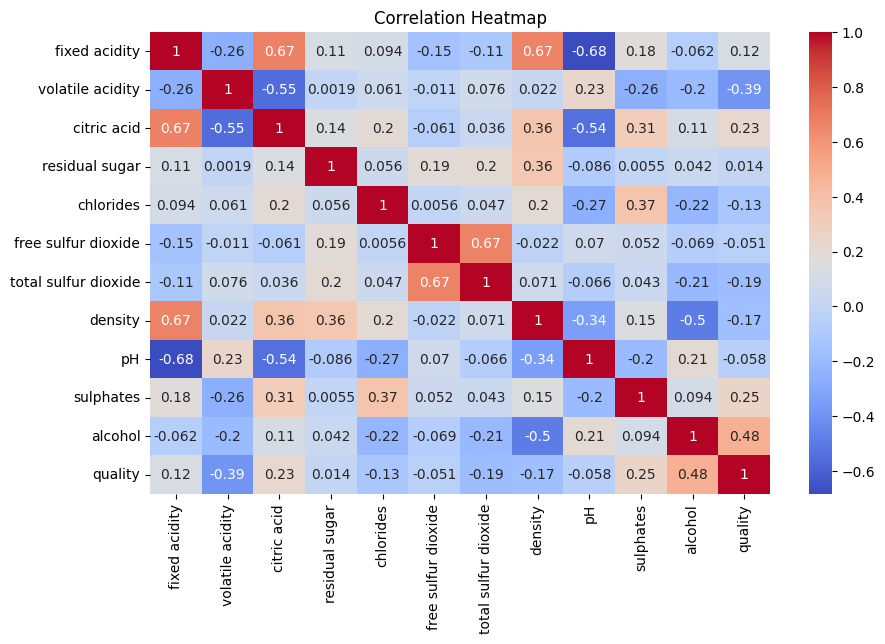

In [194]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [195]:
df.corr()['quality'].sort_values(ascending=False)



,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


#**Create Binary Target Column**

In [196]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [197]:
df['quality_label'].value_counts()


,count
quality_label,
0,1382
1,217


#**Separateing Features & Target**

In [198]:
X = df.drop(['quality','quality_label'], axis=1)
y = df['quality_label']


#**Train-Test Split**

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Logistic Regression (WITHOUT Scaling)**

In [200]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [201]:
print("Logistic Regression (Without Scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression (Without Scaling)
Accuracy: 0.859375
Precision: 0.55
Recall: 0.23404255319148937
F1 Score: 0.3283582089552239

Confusion Matrix:
[[264   9]
 [ 36  11]]


#**Apply StandardScaler + Logistic Regression (WITH Scaling)**

In [202]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [203]:
lr2 = LogisticRegression(max_iter=200)
lr2.fit(X_train_scaled, y_train)

y_pred2 = lr2.predict(X_test_scaled)


In [204]:
print("\nLogistic Regression (With Scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))



Logistic Regression (With Scaling)
Accuracy: 0.865625
Precision: 0.5909090909090909
Recall: 0.2765957446808511
F1 Score: 0.37681159420289856


#**Compare 3 Models**


#**Logistic Regression**

In [205]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)


#**KNN**

In [206]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
pred_knn = knn.predict(X_test_scaled)


#**Decision Tree**

In [207]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)


#**Accuracy Comparison**

In [208]:
print("Logistic Accuracy:", accuracy_score(y_test, pred_lr))
print("KNN Accuracy:", accuracy_score(y_test, pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))


Logistic Accuracy: 0.865625
KNN Accuracy: 0.88125
Decision Tree Accuracy: 0.871875


#**Hyperparameter Tuning (GridSearchCV)**

In [209]:
params = {
    'max_depth':[3,5,7,10],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


#**Train best model:**

In [210]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Final Accuracy: 0.896875
[[263  10]
 [ 23  24]]


#**Feature Importance**

In [211]:
importances = best_model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({'Feature':features,'Importance':importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

print(feat_df)


                 Feature  Importance
10               alcohol    0.353796
9              sulphates    0.232742
6   total sulfur dioxide    0.113440
1       volatile acidity    0.105731
5    free sulfur dioxide    0.070467
8                     pH    0.051934
4              chlorides    0.036915
0          fixed acidity    0.028199
2            citric acid    0.006776
3         residual sugar    0.000000
7                density    0.000000


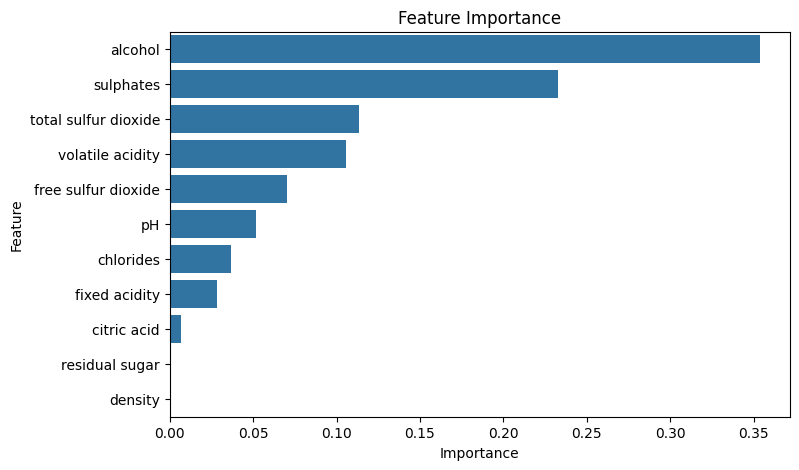

In [212]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance")
plt.show()


#**Final Conclusion**

In [213]:
print("FINAL CONCLUSION")
print("Wine quality prediction project completed successfully.")
print("Logistic Regression, KNN and Decision Tree models were compared.")
print("Decision Tree gave best performance after tuning.")
print("Feature importance shows which factors affect wine quality most.")


FINAL CONCLUSION
Wine quality prediction project completed successfully.
Logistic Regression, KNN and Decision Tree models were compared.
Decision Tree gave best performance after tuning.
Feature importance shows which factors affect wine quality most.
